# New Overlappogram Preview

In [1]:
import matplotlib.pyplot as plt
import sunpy.map
from astropy.visualization import ImageNormalize, LogStretch

from overlappy.io import read_overlappogram

In [2]:
files = [
    '/Users/wtbarnes/Documents/codes/mocksipipeline/pipeline/results/pdr-ar-1s/detector_images/all_components.fits',
    '/Users/wtbarnes/Documents/codes/mocksipipeline/pipeline/results/hic-ar-1h/detector_images/all_components.fits',
    '/Users/wtbarnes/Documents/codes/mocksipipeline/pipeline/results/pdr-flare-1s/detector_images/all_components.fits',
    '/Users/wtbarnes/Documents/codes/mocksipipeline/pipeline/results/pdr-flare-1min/detector_images/all_components.fits',
]

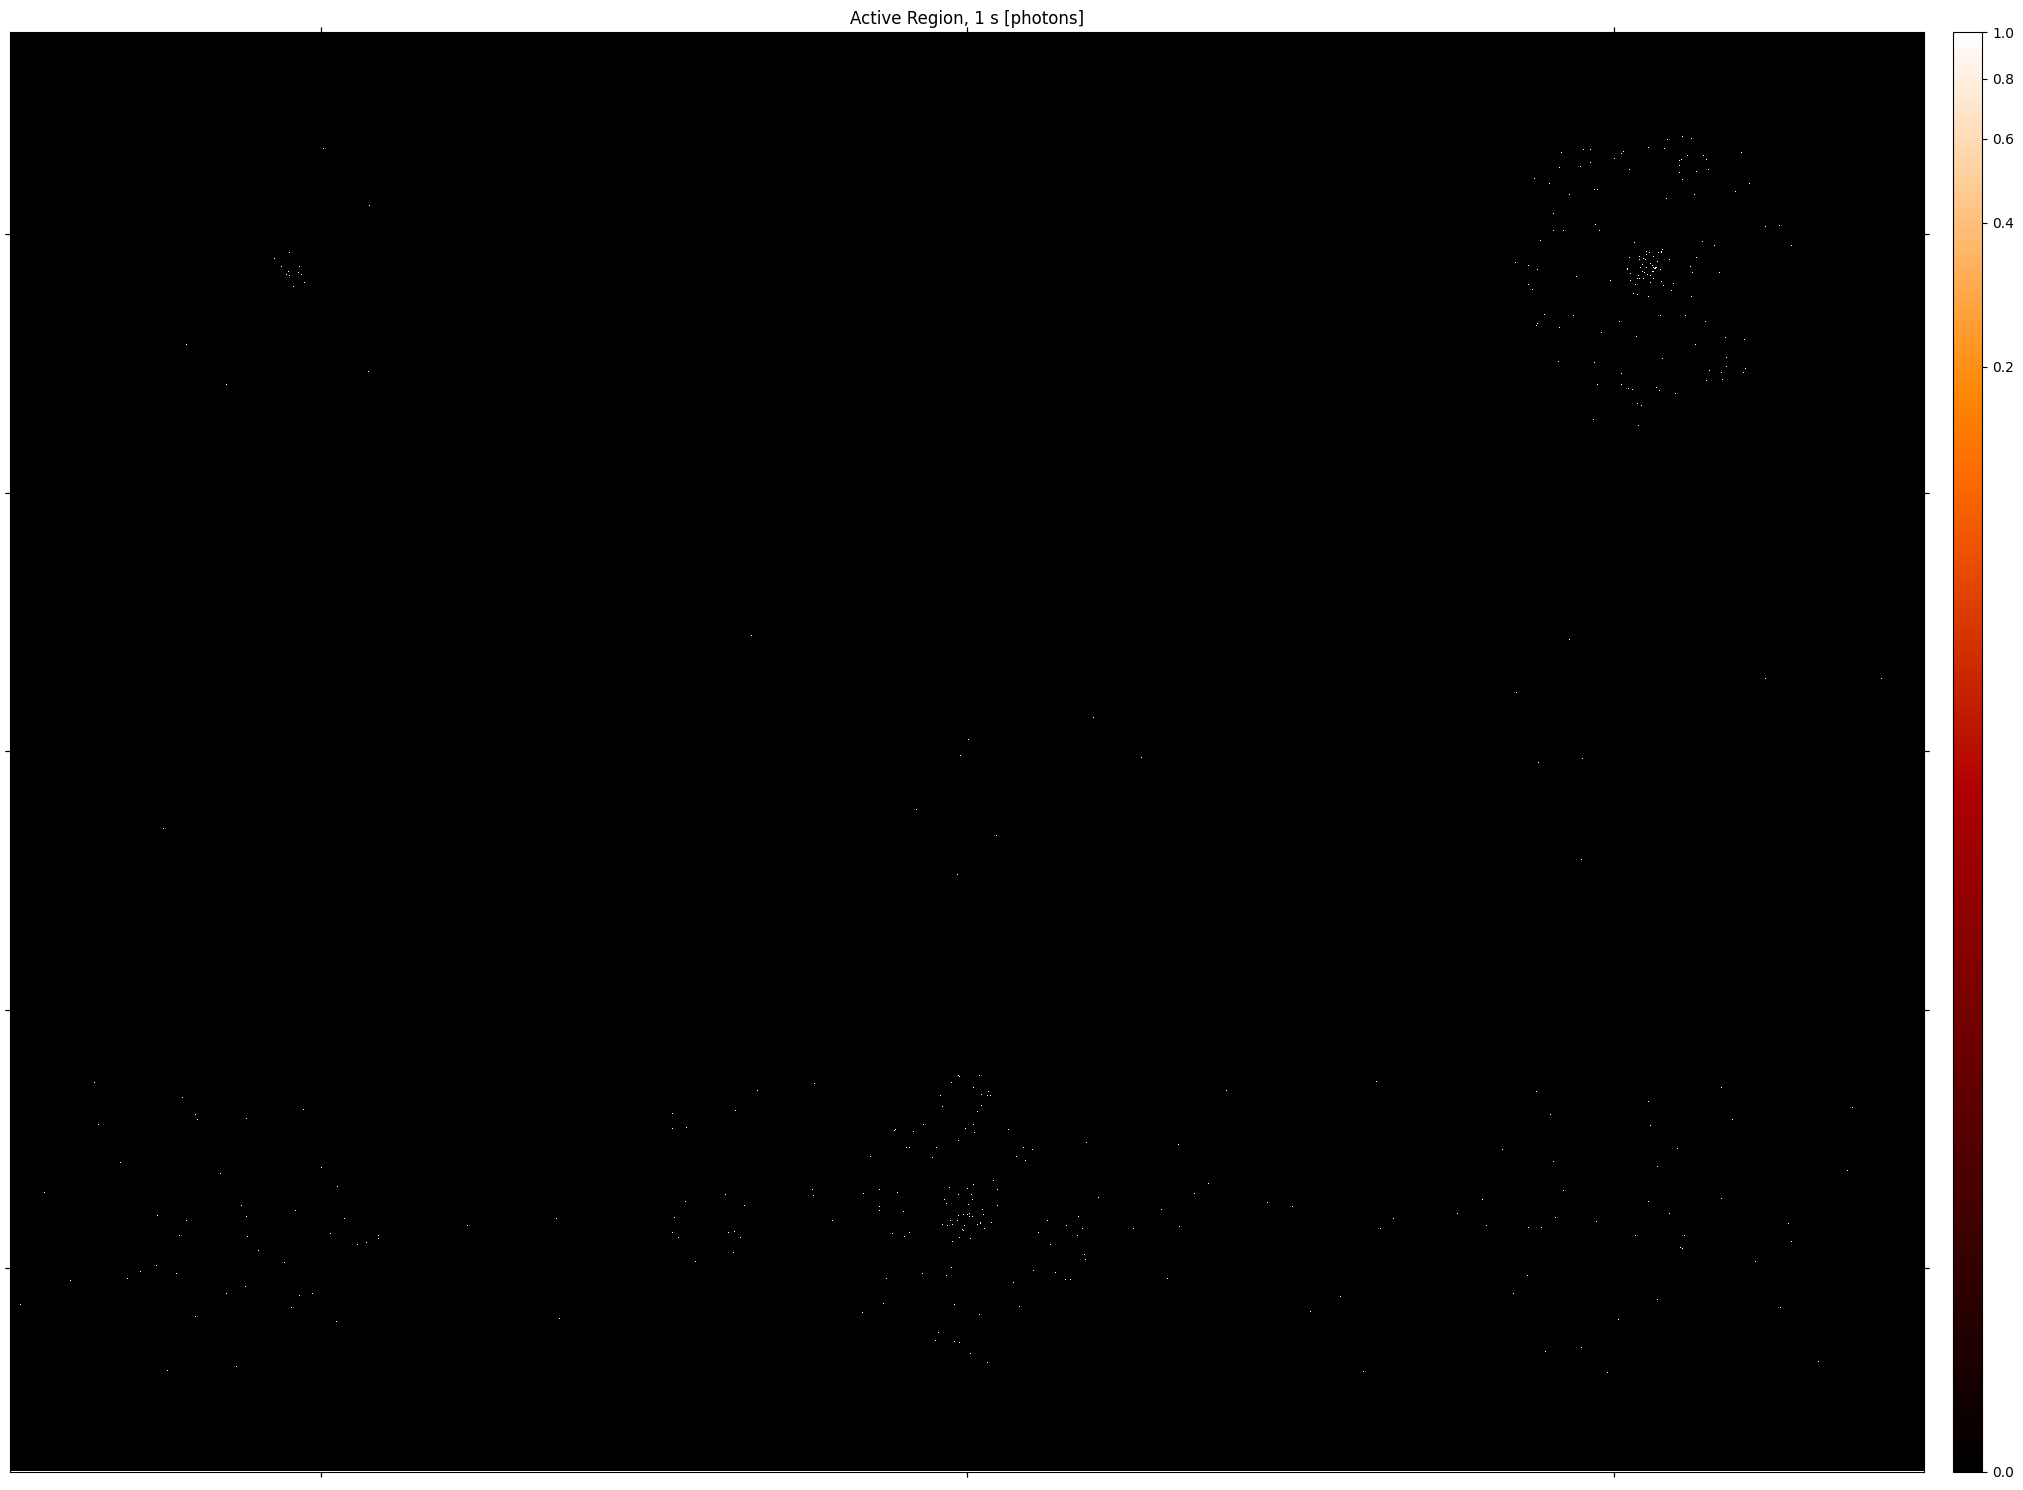

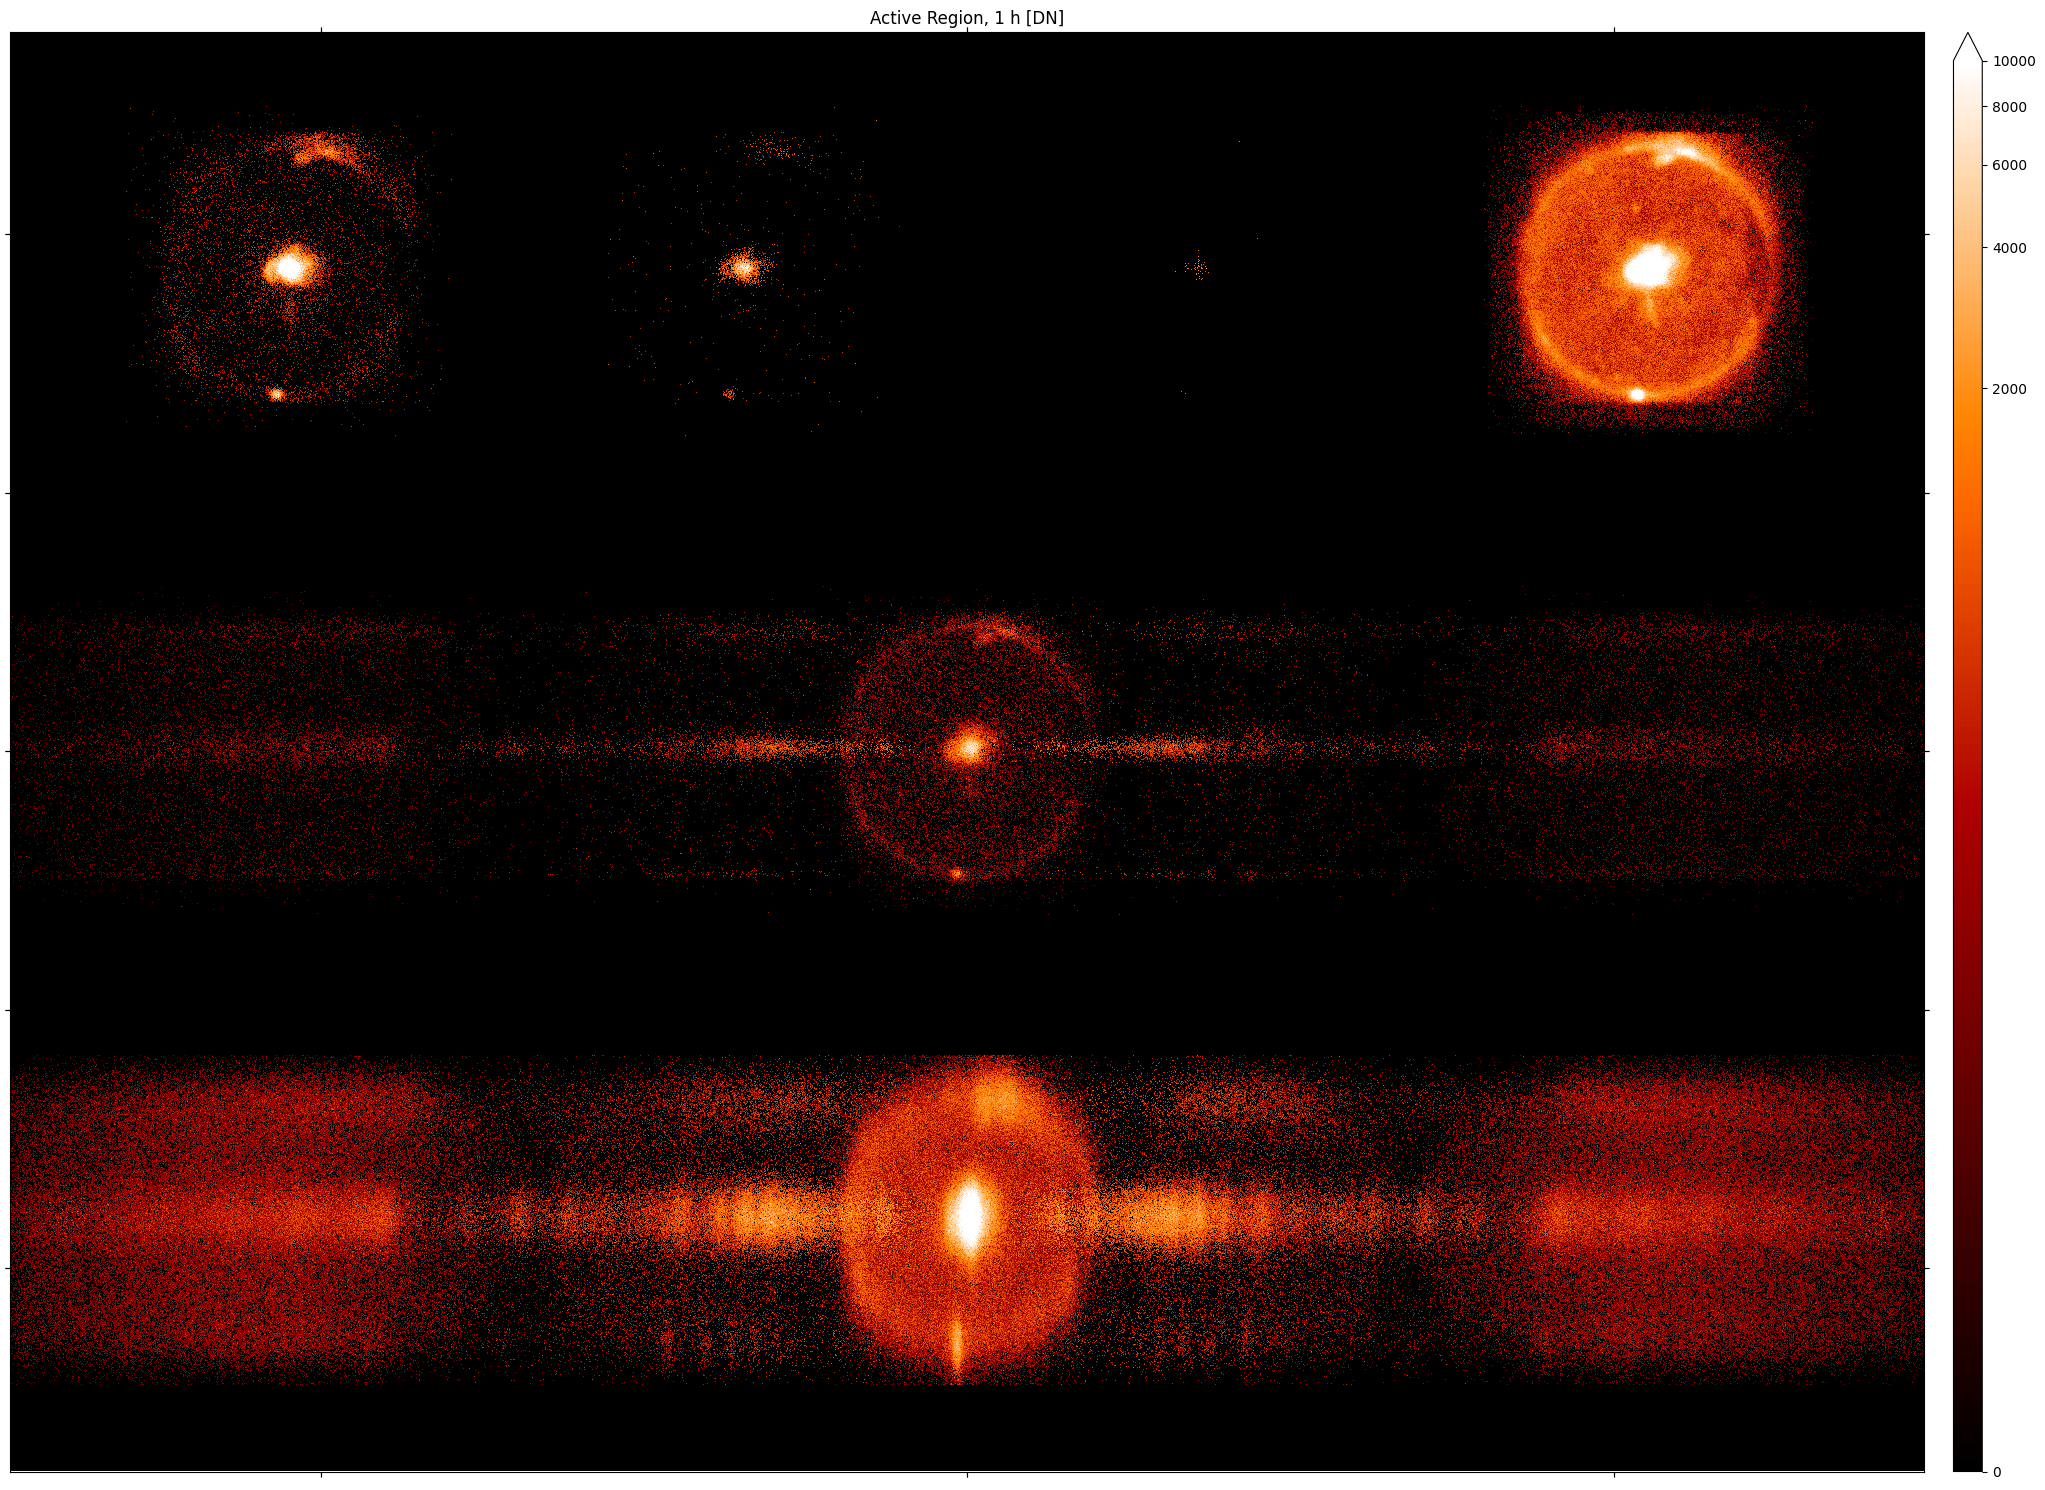

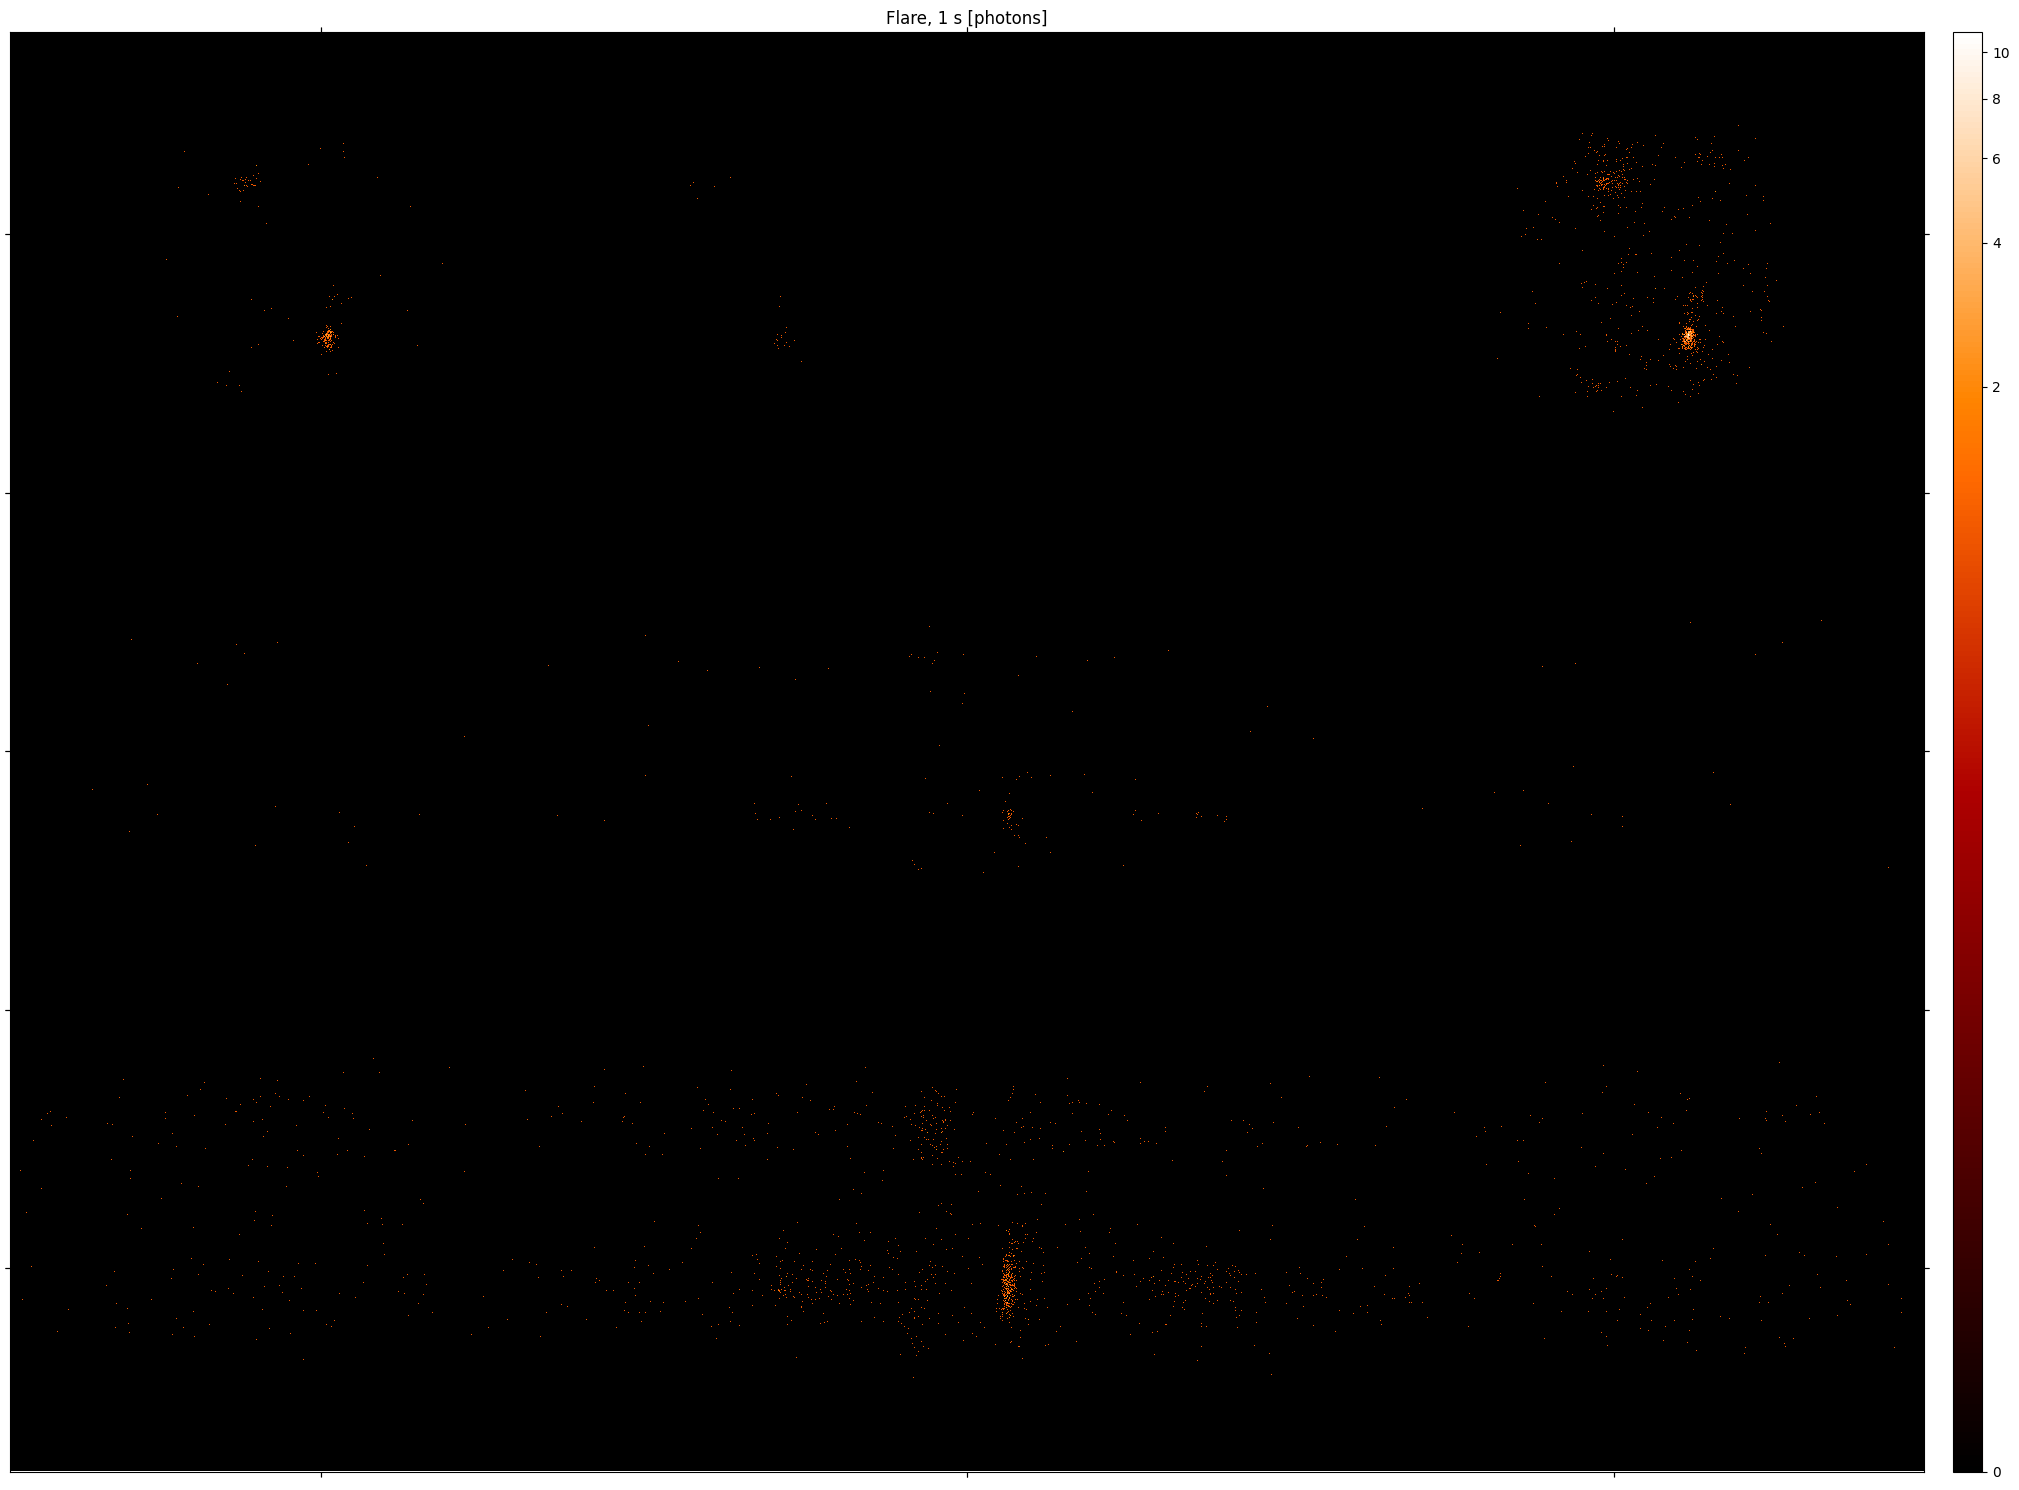

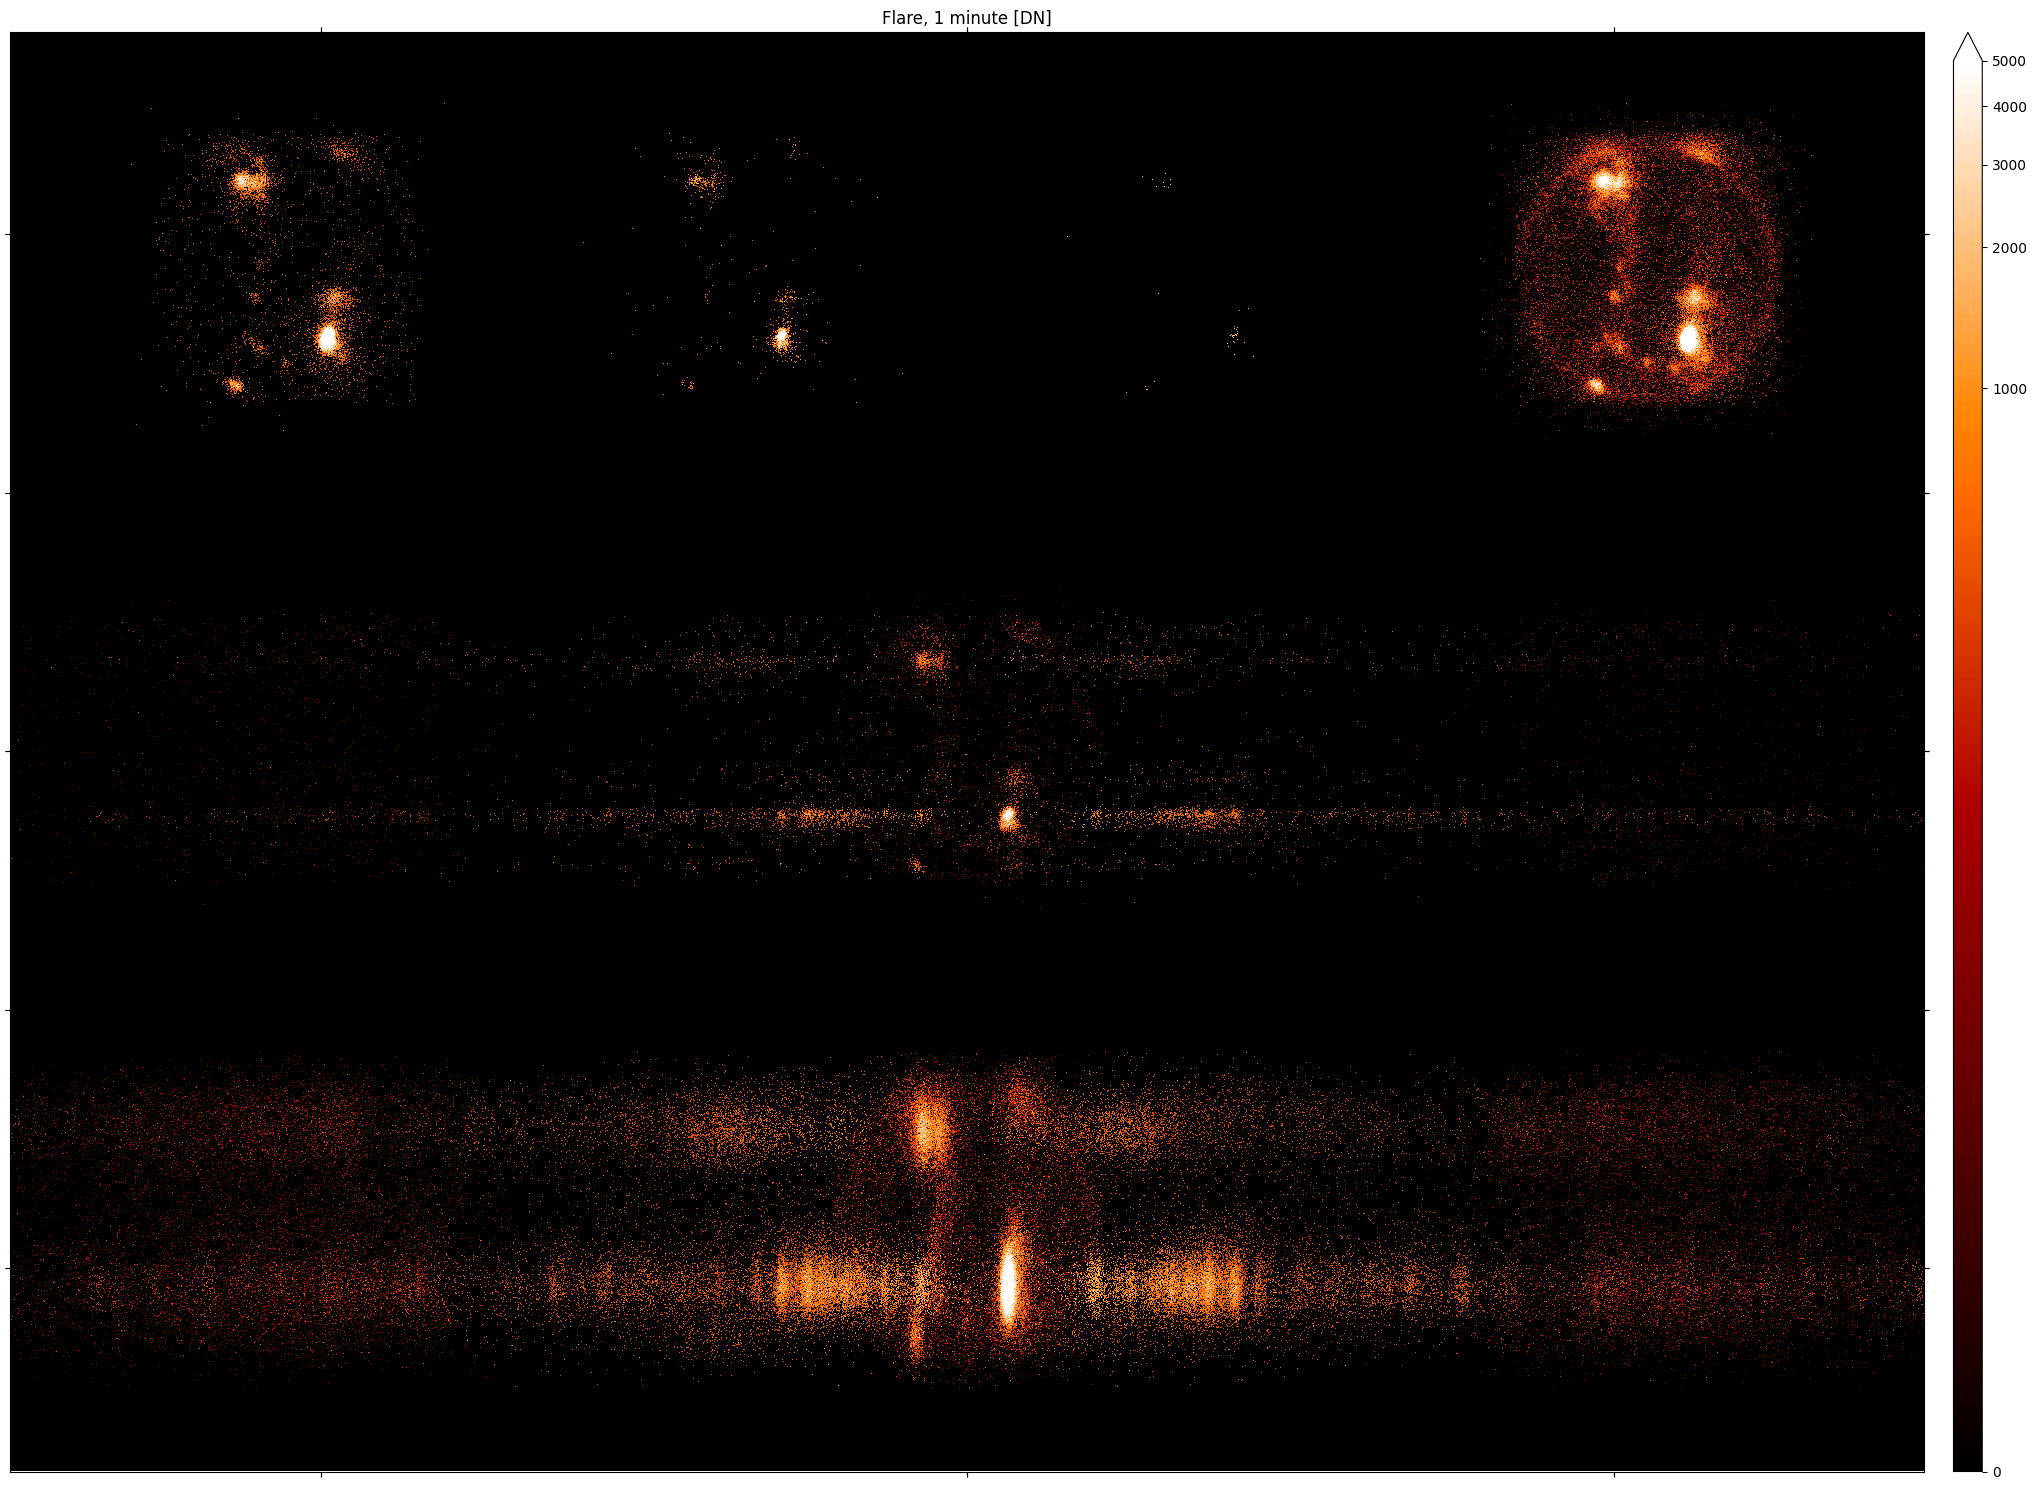

In [6]:
titles = [
    'Active Region, 1 s [photons]',
    'Active Region, 1 h [DN]',
    'Flare, 1 s [photons]',
    'Flare, 1 minute [DN]',
]
vmax = [None, 1e4, None, 5e3]
for f,title,vm in zip(files, titles,vmax):
    full_overlap_slot = read_overlappogram(f)
    fig = plt.figure(figsize=(30,30*.5),layout='tight')
    ax = fig.add_subplot(projection=full_overlap_slot[0].wcs)
    full_overlap_slot[0].plot(axes=ax,
                              cmap='hinodexrt',
                              interpolation='none',
                              norm=ImageNormalize(vmax=vm,stretch=LogStretch()))
    cbar_kwargs = {}
    if vm is not None:
        cbar_kwargs = {'extend':'max', 'extendfrac':0.02}
    fig.colorbar(ax.get_images()[0], ax=ax, orientation='vertical', pad=0.01, aspect=50, **cbar_kwargs)
    ax.set_title(title)
    fig.savefig(f'/Users/wtbarnes/Documents/projects/cubixss/PDR/figures/{title}.pdf', bbox_inches='tight')

(1000.0, 2000.0)

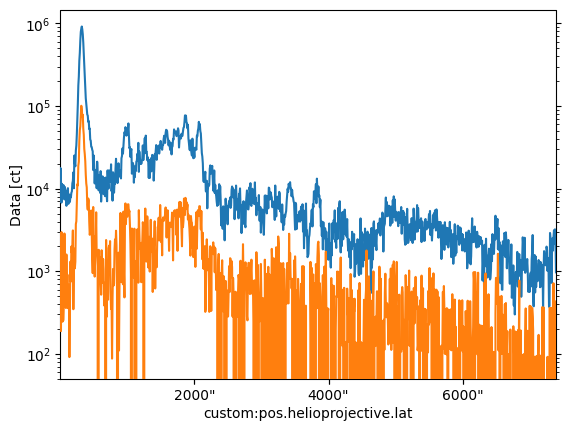

In [150]:
full_overlap = read_overlappogram(files[3])
overlap_slot_slice = full_overlap[:,100:300,:]
overlap_pinhole_slice = full_overlap_slot[:,600:750,:]
fig = plt.figure()
_rebinned = overlap_slot_slice[0].rebin(overlap_slot_slice[0].data.shape[:1]+(1,),operation=np.sum)[0]
ax = fig.add_subplot(projection=_rebinned.wcs)
_rebinned.plot(axes=ax)
_rebinned = overlap_pinhole_slice[0].rebin(overlap_pinhole_slice[0].data.shape[:1]+(1,),operation=np.sum)[0]
_rebinned.plot(axes=ax) 
ax.set_yscale('log')
ax.set_xlim(1000,2000)

In [147]:
overlap_slice

NDCube
------
Dimensions: [1166.  200. 2000.] pix
Physical Types of Axes: [('em.wl',), ('custom:pos.helioprojective.lon', 'custom:pos.helioprojective.lat'), ('custom:pos.helioprojective.lon', 'custom:pos.helioprojective.lat')]
Unit: ct
Data Type: >f8

In [49]:
from mocksipipeline.spectral import get_spectral_tables
from synthesizAR.atomic.idl import read_spectral_table, write_spectral_table

In [50]:
spec_tables = get_spectral_tables()

In [52]:
spec_table_coronal_full = spec_tables['sun_coronal_1992_feldman_ext_all']

In [64]:
write_spectral_table('chianti-spectrum-coronal-truncated.asdf', spec_table_coronal_full[:,:1800])

In [62]:
from mocksipipeline.util import read_data_cube, read_cube_with_xarray
from mocksipipeline.modeling import convolve_with_response
from mocksipipeline.instrument.configuration import moxsi_slot
dem_cube = read_cube_with_xarray('/Users/wtbarnes/Documents/codes/mocksipipeline/pipeline/results/pdr-ar-1h/dem_cube.nc',
                                 'temperature', 'phys.temperature')
spec_cube = read_data_cube('/Users/wtbarnes/Documents/codes/mocksipipeline/pipeline/results/pdr-ar-1h/spectral_cube.fits')
tr_cube_sp0 = convolve_with_response(spec_cube, moxsi_slot['spectrogram_pinhole_0'], electrons=False, include_gain=False)
instr_cube_f40 = convolve_with_response(spec_cube, moxsi_slot['filtergram_4_0'], electrons=False, include_gain=False)

/Users/wtbarnes/mambaforge/envs/mocksipipeline-dev/lib/python3.11/site-packages/astropy/units/equivalencies.py:141: RuntimeWarning: divide by zero encountered in divide
  (si.m, si.J, lambda x: hc / x),
/Users/wtbarnes/mambaforge/envs/mocksipipeline-dev/lib/python3.11/site-packages/xrt/backends/raycing/materials.py:253: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  ef1f2 = (np.array(res[self.name+'_E']),
/Users/wtbarnes/mambaforge/envs/mocksipipeline-dev/lib/python3.11/site-packages/xrt/backends/raycing/materials.py:254: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  np.array(res[self.name+'_f1']),
/Users/wtbarnes/mambaforge/envs/mocksipipeline-dev/lib/python3.11/site-packages/xrt/backends/raycing/materials.py:255: UserWarning: Readi

In [69]:
cf = moxsi_slot['spectrogram_pinhole_0'].electron_per_photon * moxsi_slot['spectrogram_pinhole_0'].camera_gain

/Users/wtbarnes/mambaforge/envs/mocksipipeline-dev/lib/python3.11/site-packages/astropy/units/equivalencies.py:141: RuntimeWarning: divide by zero encountered in divide
  (si.m, si.J, lambda x: hc / x),


In [72]:
import astropy.units as u
np.where(moxsi_slot['spectrogram_pinhole_0']._energy_out_of_bounds, 0 * u.Unit('ct /ph'), cf)

<Quantity [0.00000000e+00, 8.51633144e+04, 4.25816572e+04, ...,
           7.32272695e+01, 7.31643594e+01, 7.31015574e+01] ct / ph>

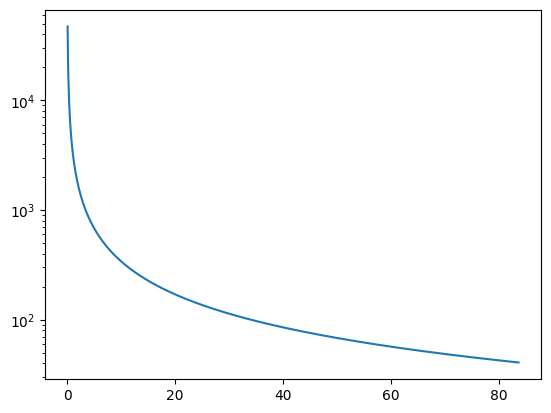

In [68]:
plt.plot(moxsi_slot['spectrogram_pinhole_0'].wavelength,
         moxsi_slot['spectrogram_pinhole_0'].electron_per_photon)
plt.yscale('log')

In [63]:
instr_cube_f40.rebin(instr_cube_f40.data.shape[:1]+(1,1))[0].data

array([[3.62612013e-09, 3.62612013e-09, 3.62612013e-09, ...,
        3.62612013e-09, 3.62612013e-09, 3.62612013e-09],
       [3.62612013e-09, 3.62612013e-09, 3.62612013e-09, ...,
        3.62612013e-09, 3.62612013e-09, 3.62612013e-09],
       [3.62612013e-09, 3.62612013e-09, 3.62612013e-09, ...,
        3.62612013e-09, 3.62612013e-09, 3.62612013e-09],
       ...,
       [3.62612013e-09, 3.62612013e-09, 3.62612013e-09, ...,
        3.62612013e-09, 3.62612013e-09, 3.62612013e-09],
       [3.62612013e-09, 3.62612013e-09, 3.62612013e-09, ...,
        3.62612013e-09, 3.62612013e-09, 3.62612013e-09],
       [3.62612013e-09, 3.62612013e-09, 3.62612013e-09, ...,
        3.62612013e-09, 3.62612013e-09, 3.62612013e-09]])

Make a plot of the updated effective areas for the PDR slides

  'angstrom' -> 'Angstrom'. [astropy.wcs.wcs]
/Users/wtbarnes/mambaforge/envs/mocksipipeline-dev/lib/python3.11/site-packages/astropy/units/equivalencies.py:141: RuntimeWarning: divide by zero encountered in divide
  (si.m, si.J, lambda x: hc / x),
/Users/wtbarnes/mambaforge/envs/mocksipipeline-dev/lib/python3.11/site-packages/xrt/backends/raycing/materials.py:253: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  ef1f2 = (np.array(res[self.name+'_E']),
/Users/wtbarnes/mambaforge/envs/mocksipipeline-dev/lib/python3.11/site-packages/xrt/backends/raycing/materials.py:254: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  np.array(res[self.name+'_f1']),
/Users/wtbarnes/mambaforge/envs/mocksipipeline-dev/lib/python3.11/site-packages/xrt/backend

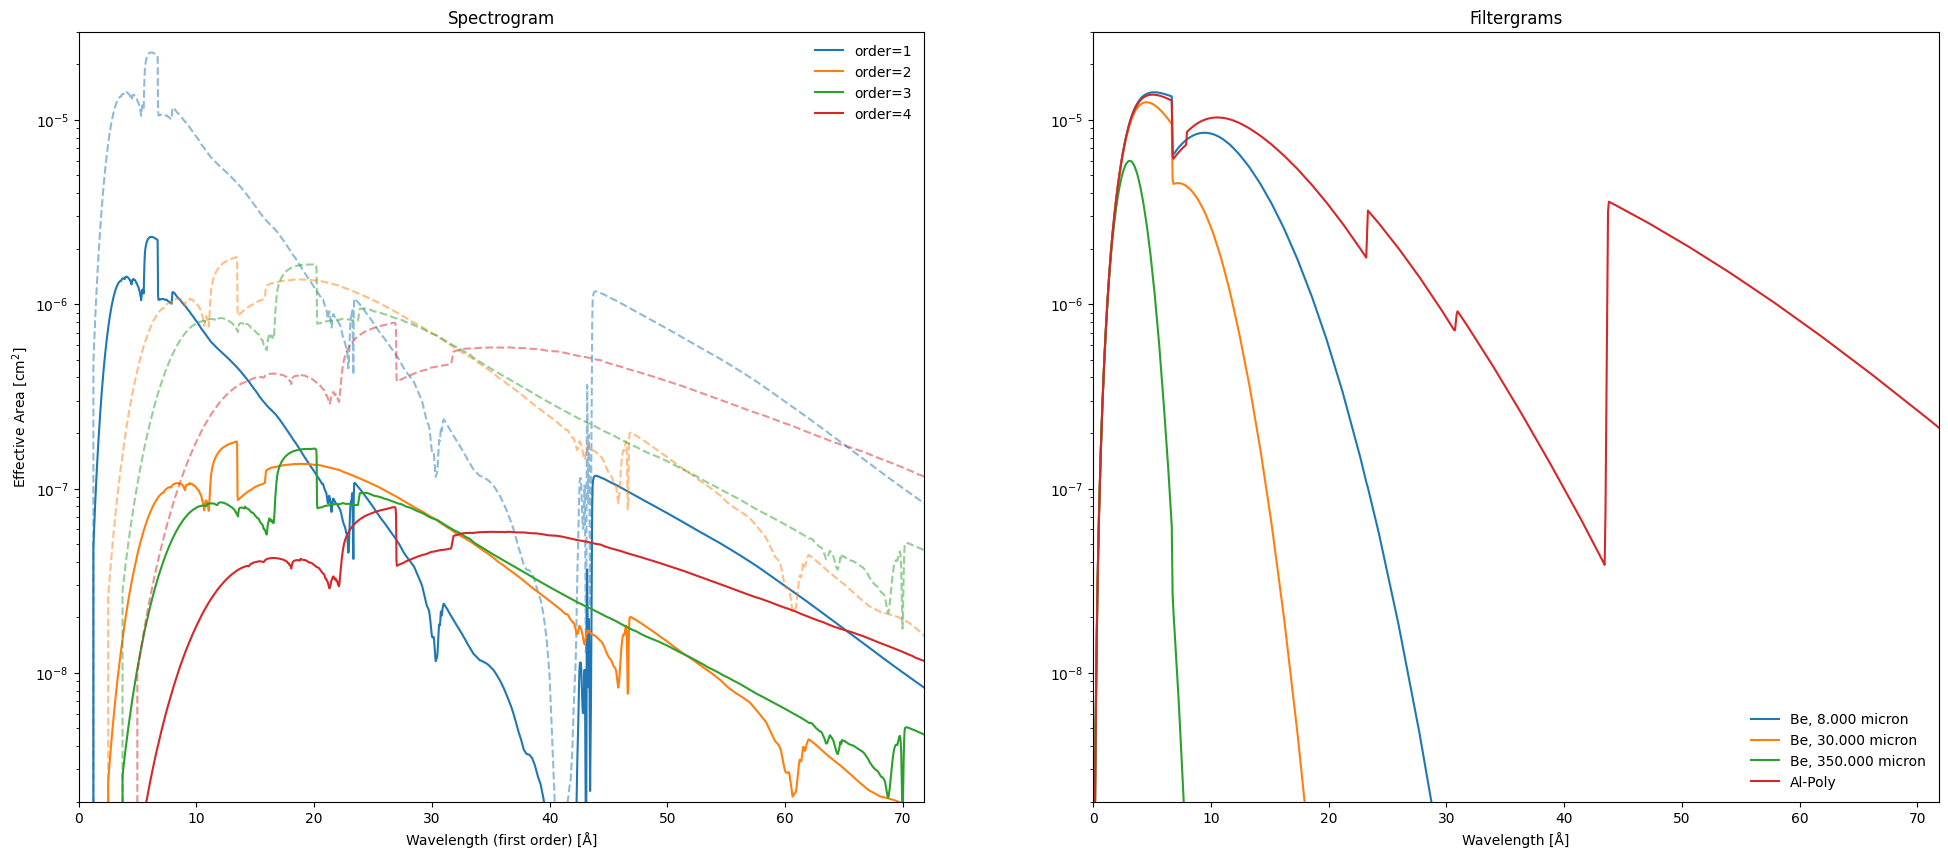

In [209]:
from astropy.visualization import quantity_support

from mocksipipeline.instrument.configuration import moxsi_slot_filtergrams, moxsi_slot_spectrogram_slot

fig = plt.figure(figsize=(24,10))
with quantity_support():
    ax_spec = fig.add_subplot(121)
    channel_1 = moxsi_slot_spectrogram_pinhole.channel_list[5]
    for channel_p,channel_s in zip(moxsi_slot_spectrogram_pinhole.channel_list[5:], moxsi_slot_spectrogram_slot.channel_list[5:]):
        _index,_,_ = channel_p.get_wcs(earth_obs).world_to_pixel(source_loc, channel_p.wavelength)
        l, = ax_spec.plot(_index, channel_p.effective_area, label=f'order={channel_p.spectral_order}')
        ax_spec.plot(_index, channel_s.effective_area, color=l.get_color(), ls='--', alpha=0.5)
    ax_spec.set_yscale('log')
    ax_spec.set_ylim(2e-9,3e-5)
    wave_labels = [0, 10, 20, 30, 40, 50, 60, 70]*u.AA
    xticks,_,_ = channel_1.get_wcs(earth_obs).world_to_pixel(source_loc,wave_labels)
    ax_spec.set_xticks(xticks, labels=[f'{w:.2g}' for w in wave_labels.to_value()])
    ax_spec.set_xlim(1000,2000)
    ax_spec.set_xlabel('Wavelength (first order) [Å]')
    ax_spec.set_ylabel('Effective Area [cm$^2$]')
    ax_spec.legend(loc=1, frameon=False)
    ax_spec.set_title('Spectrogram')

ax_filter = fig.add_subplot(122,sharex=ax_spec, sharey=ax_spec)
for channel in moxsi_slot_filtergrams.channel_list:
    _index,_,_ = channel_1.get_wcs(earth_obs).world_to_pixel(source_loc, channel.wavelength)
    ax_filter.plot(_index, channel.effective_area, label='Al-Poly' if 'Al' in channel.filter_label else channel.filter_label)
ax_filter.set_xlabel('Wavelength [Å]')
ax_filter.legend(loc=4, frameon=False)
ax_filter.set_title('Filtergrams')
fig.savefig('/Users/wtbarnes/Documents/projects/cubixss/PDR/figures/effective_area.pdf', bbox_inches='tight',
            transparent=True)

In [186]:
from sunpy.net import Fido, attrs as a

q = Fido.search(a.Time('2018-07-14T14:30:00', '2018-07-14T15:05:00',),
                a.Instrument.xrt,
                #a.vso.Extent(None, None, None, None, 'FULLDISK')
               )
q = q[0][q[0]['Extent Type'] == 'FULLDISK']
be_thin = [3,30] * u.AA
q = q[np.all(q['Wavelength'] == be_thin, axis=1)]

In [187]:
q

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent X,Extent Y,Extent Type,Size
,,,,Angstrom,,,,,,,Mibyte
Time,Time,str6,str3,float64[2],str3,str9,str5,str10,str10,str11,float64
2018-07-14 15:04:11.532,2018-07-14 15:04:11.895,Hinode,XRT,3.0 .. 30.0,SAO,Intensity,Broad,-20.791468,18.805048,FULLDISK,4114.6875
2018-07-14 15:04:17.003,2018-07-14 15:04:19.902,Hinode,XRT,3.0 .. 30.0,SAO,Intensity,Broad,-20.854431,18.622801,FULLDISK,4114.6875
2018-07-14 15:04:25.005,2018-07-14 15:04:41.390,Hinode,XRT,3.0 .. 30.0,SAO,Intensity,Broad,-20.731709,18.682028,FULLDISK,4114.6875


In [188]:
xrt_files = Fido.fetch(q)

Files Downloaded:   0%|          | 0/3 [00:00<?, ?file/s]

l1_xrt20180714_150411_5.fits:   0%|          | 0.00/4.21M [00:00<?, ?B/s]

l1_xrt20180714_150425_0.fits:   0%|          | 0.00/4.21M [00:00<?, ?B/s]

l1_xrt20180714_150417_0.fits:   0%|          | 0.00/4.21M [00:00<?, ?B/s]

In [184]:
import sunpy.map
xrt_maps = sunpy.map.Map(xrt_files)

In [185]:
xrt_maps

 SunPy Map
 ---------
 Observatory:		 Hinode
 Instrument:		 XRT
 Detector:		 XRT
 Measurement:		 Open-Al mesh
 Wavelength:		 Unknown
 Observation Date:	 2018-07-14 15:03:29
 Exposure Time:		 0.065576 s
 Dimension:		 [1024. 1024.] pix
 Coordinate System:	 helioprojective
 Scale:			 [2.0572 2.0572] arcsec / pix
 Reference Pixel:	 [511.5 511.5] pix
 Reference Coord:	 [-20.8515625  18.4335537] arcsec                   
 array([[ -6.098238 ,  26.703138 ,  12.075822 , ..., -18.136797 ,
         -47.278934 ,   5.050565 ],
        [  1.1663729,  29.930727 ,   6.527089 , ..., -26.726246 ,
         -37.089962 ,  23.034746 ],
        [ -4.1594296,  -4.467122 ,   5.8003983, ..., -16.060974 ,
           2.1773167,  36.12911  ],
        ...,
        [ 46.94416  ,  39.745987 ,  10.370921 , ...,   9.145689 ,
          16.365063 , -12.110965 ],
        [ 11.826742 , -11.658807 ,  -3.091649 , ...,  -2.329397 ,
         -15.162693 , -36.659836 ],
        [  7.235563 ,  11.581897 ,   0.5674095, ...,  34.4

In [189]:
foo = sunpy.map.Map('/Users/wtbarnes/Documents/codes/mocksipipeline/pipeline/results/hic-ar-1h/level_1/xrt_Be-thin:Open.fits')

Observatory,Hinode
Instrument,XRT
Detector,XRT
Measurement,Be thin-Open
Wavelength,Unknown
Observation Date,2018-07-14 15:04:25
Exposure Time,16.385 s
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[2.0572 2.0572] arcsec / pix
Reference Pixel,[511.5 511.5] pix

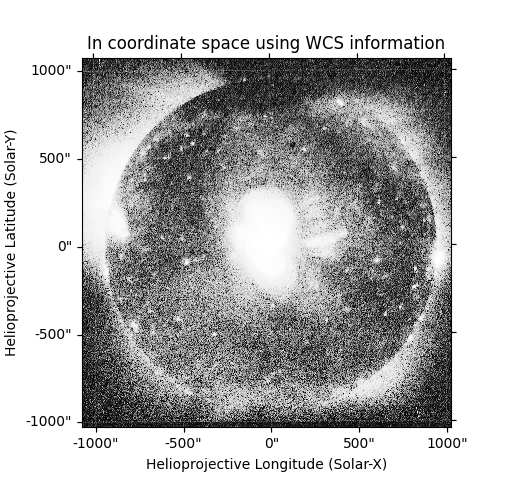
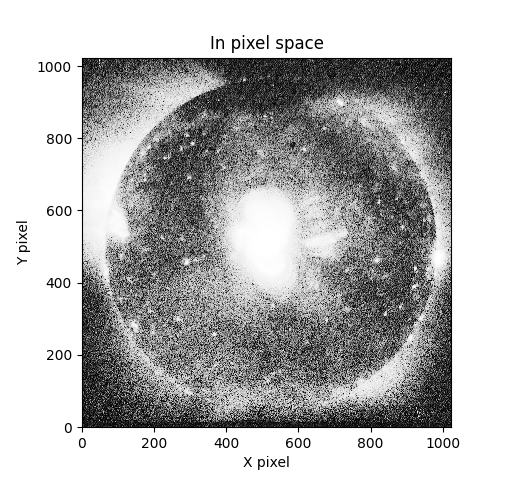
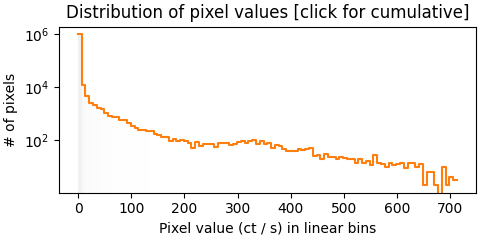
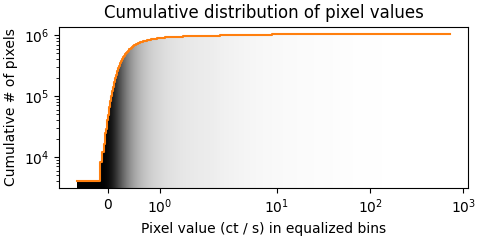

In [191]:
foo

In [216]:
import astropy.time
window = 6 * u.s
time_center = astropy.time.Time('2018-07-14T15:00:00')
q = Fido.search(
    a.Time(time_center-window/2, end=time_center+window/2, near=time_center),
    #a.Instrument.aia,
    #a.Wavelength(94*u.AA, wavemax=335*u.AA),#|a.Wavelength(193*u.AA)|a.Wavelength(211*u.AA),
    a.AttrOr([a.Wavelength(w) for w in [94, 131, 171, 193, 211, 335]*u.angstrom]),
    a.jsoc.Series('aia.lev1_euv_12s'),
    a.jsoc.Segment('image'),
    a.jsoc.Notify('wtb2@rice.edu'),
)

In [219]:
aia_files_jsoc = Fido.fetch(q, path='/Users/wtbarnes/Documents/codes/mocksipipeline/pipeline/results/hic-ar-1h/level_1/')

Export request pending. [id=JSOC_20240126_1894, status=2]
Waiting for 0 seconds...
2 URLs found for download. Full request totalling 10MB
Export request pending. [id=JSOC_20240126_1901, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20240126_1901, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20240126_1901, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20240126_1901, status=1]
Waiting for 5 seconds...
2 URLs found for download. Full request totalling 8MB
Export request pending. [id=JSOC_20240126_1904, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20240126_1904, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20240126_1904, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20240126_1904, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20240126_1904, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20240126_1904, status=1]
Wai

Files Downloaded:   0%|          | 0/12 [00:00<?, ?file/s]

aia.lev1_euv_12s.2018-07-14T150001Z.94.image_lev1.fits:   0%|          | 0.00/10.4M [00:00<?, ?B/s]

aia.lev1_euv_12s.2018-07-14T150001Z.94.spikes.fits:   0%|          | 0.00/83.5k [00:00<?, ?B/s]

aia.lev1_euv_12s.2018-07-14T150008Z.131.image_lev1.fits:   0%|          | 0.00/8.12M [00:00<?, ?B/s]

aia.lev1_euv_12s.2018-07-14T150008Z.131.spikes.fits:   0%|          | 0.00/89.3k [00:00<?, ?B/s]

aia.lev1_euv_12s.2018-07-14T150010Z.171.image_lev1.fits:   0%|          | 0.00/11.5M [00:00<?, ?B/s]

aia.lev1_euv_12s.2018-07-14T150010Z.171.spikes.fits:   0%|          | 0.00/46.1k [00:00<?, ?B/s]

aia.lev1_euv_12s.2018-07-14T150006Z.193.image_lev1.fits:   0%|          | 0.00/10.9M [00:00<?, ?B/s]

aia.lev1_euv_12s.2018-07-14T150006Z.193.spikes.fits:   0%|          | 0.00/51.8k [00:00<?, ?B/s]

aia.lev1_euv_12s.2018-07-14T145959Z.211.image_lev1.fits:   0%|          | 0.00/9.40M [00:00<?, ?B/s]

aia.lev1_euv_12s.2018-07-14T145959Z.211.spikes.fits:   0%|          | 0.00/72.0k [00:00<?, ?B/s]

aia.lev1_euv_12s.2018-07-14T150002Z.335.image_lev1.fits:   0%|          | 0.00/7.08M [00:00<?, ?B/s]

aia.lev1_euv_12s.2018-07-14T150002Z.335.spikes.fits:   0%|          | 0.00/121k [00:00<?, ?B/s]

In [221]:
import drms
drms.Client().info('aia.lev1_euv_12s').segments.index.values

array(['image', 'spikes'], dtype=object)

In [233]:
aia_maps = sunpy.map.Map('/Users/wtbarnes/Documents/codes/mocksipipeline/pipeline/results/hic-ar-1h/level_1/aia*.fits')

In [234]:
len(aia_maps)

6